Index(['timeTick', ' roll', ' pitch', ' yaw', ' gyroX', ' gyroY', ' gyroZ',
       ' stateX', ' stateY', ' stateZ', ' stateVX', ' stateVY', ' stateVZ',
       ' whisker1', ' whisker2', ' whisker3', ' motor1', ' motor2', ' motor3',
       ' motor4', ' otX', ' otY', ' otZ', ' otRoll', ' otPitch', ' otYaw',
       ' otq0', ' otq1', ' otq2', ' otq3'],
      dtype='object')


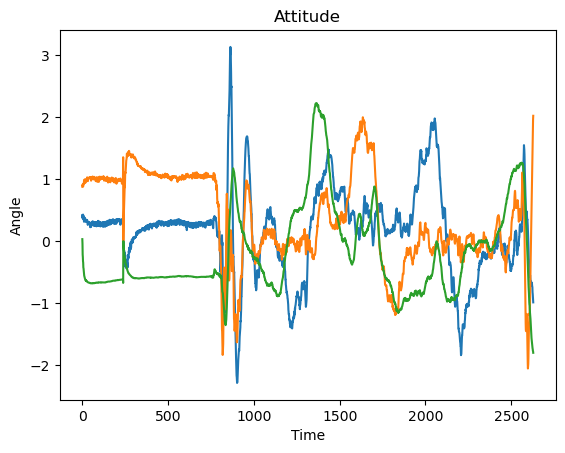

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
csv_file = 'data/20240116/2024-01-16+16:54:11+optitrackstate.csv'
df = pd.read_csv(csv_file)

# 将第一列设置为时间索引

print(df.columns)
# 绘制图表
plt.plot(df[' pitch'])
plt.plot(df[' roll'])
plt.plot(df[' yaw'])
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Attitude')
plt.show()

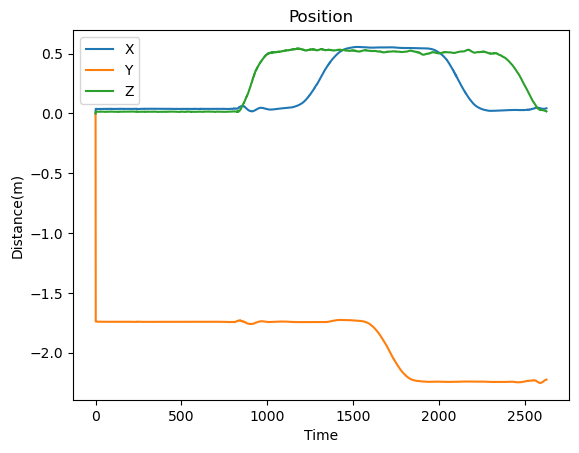

In [35]:
plt.plot(df[' stateX'],label='X')
plt.plot(df[' stateY'],label='Y')
plt.plot(df[' stateZ'],label='Z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.title('Position')
plt.show()

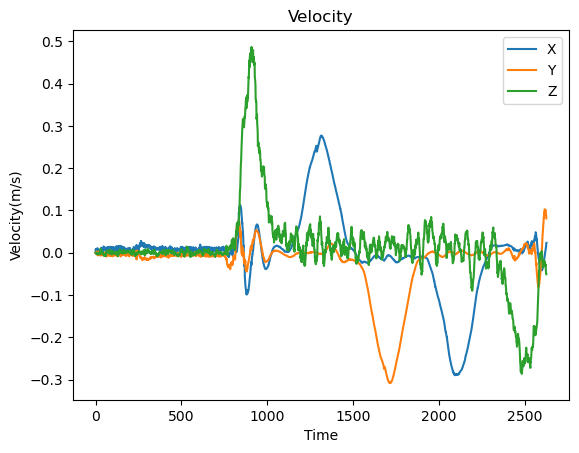

In [36]:
plt.plot(df[' stateVX'],label='X')
plt.plot(df[' stateVY'],label='Y')
plt.plot(df[' stateVZ'],label='Z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.title('Velocity')
plt.show()

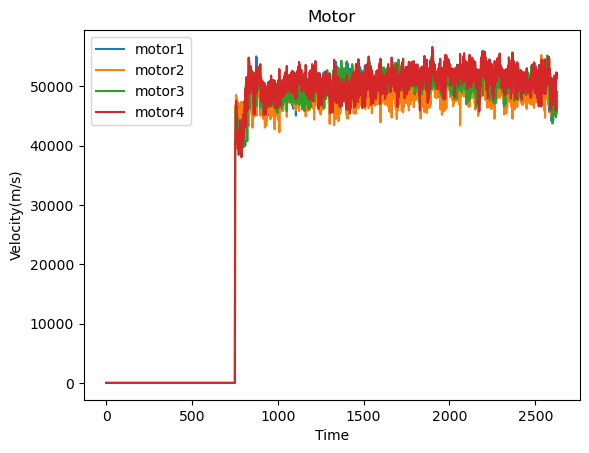

In [37]:
plt.plot(df[' motor1'],label='motor1')
plt.plot(df[' motor2'],label='motor2')
plt.plot(df[' motor3'],label='motor3')
plt.plot(df[' motor4'],label='motor4')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.title('Motor')
plt.show()

Index(['timeTick', ' stateX', ' stateY', ' stateZ', ' stateVX', ' stateVY',
       ' stateVZ', ' whisker1', ' whisker2', ' whisker3', ' motor1', ' motor2',
       ' motor3', ' motor4', ' laserHeight', ' laserFront', ' laserBack',
       ' laserUp', ' laserLeft', ' laserRight'],
      dtype='object')


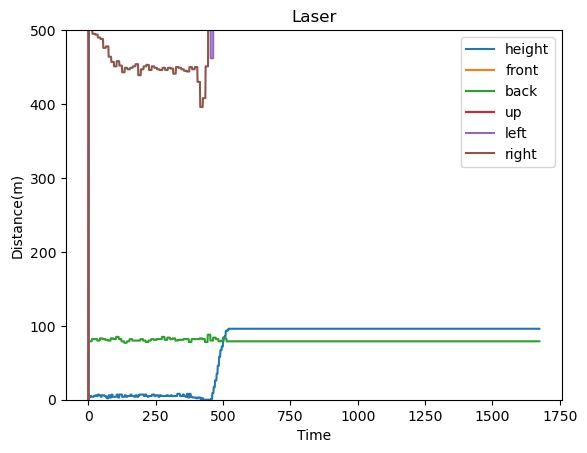

In [38]:
csv_file = 'data/20240116/2024-01-17+12:25:27+optitrackstate.csv'
df = pd.read_csv(csv_file)

# 将第一列设置为时间索引

print(df.columns)
# 绘制图表
plt.plot(df[' laserHeight'],label='height')
plt.plot(df[' laserFront'],label='front')
plt.plot(df[' laserBack'],label='back')
plt.plot(df[' laserUp'],label='up')
plt.plot(df[' laserLeft'],label='left')
plt.plot(df[' laserRight'],label='right')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.ylim(0, 500)
plt.title('Laser')
plt.show()

Index(['timeTick', ' stateX', ' stateY', ' stateZ', ' stateVX', ' stateVY',
       ' stateVZ', ' whisker1', ' whisker2', ' whisker3', ' motor1', ' motor2',
       ' motor3', ' motor4', ' laserHeight', ' laserFront', ' laserBack',
       ' laserUp', ' laserLeft', ' laserRight'],
      dtype='object')


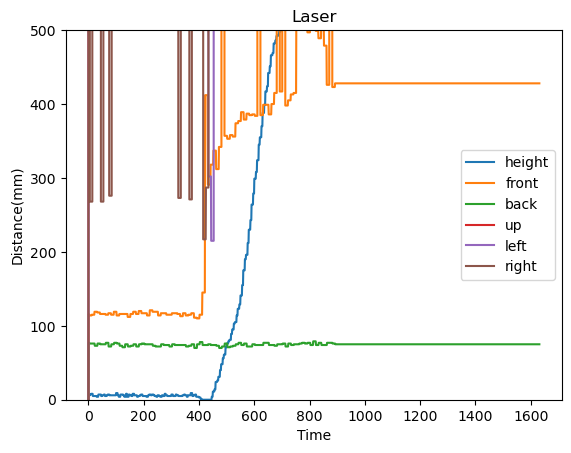

In [39]:
csv_file = 'data/20240116/2024-01-17+12:34:00+optitrackstate.csv'
df = pd.read_csv(csv_file)

# 将第一列设置为时间索引

print(df.columns)
# 绘制图表
plt.plot(df[' laserHeight'],label='height')
plt.plot(df[' laserFront'],label='front')
plt.plot(df[' laserBack'],label='back')
plt.plot(df[' laserUp'],label='up')
plt.plot(df[' laserLeft'],label='left')
plt.plot(df[' laserRight'],label='right')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(mm)')
plt.ylim(0, 500)
plt.title('Laser')
plt.show()

Camera
Optitrack raw or kalman output
Laser range
Wall